Face detection using Haar Cascades, which is ey component of the Viola-Jones object detection framework.

Note: Face detection is not face recognition. Both are very different.

We will be able very quickly detect if a face is in a image and locate it. However we wont know who's face it belongs to/

We would need a really large dataset and deep learning for facial recognition.

The main feature types are:
1. Edge fearures
2. line features
3. four rectangle feature

Each feature is a single value obtained by subtracting sum of pixels under white rectangle from sum of pixels under black rectangle.

This features are calculated by:  NOte: The closer we actually are to 1, the better the feature.

mean(dark region) - mean(light region)

The Viola Jones algorithm solves this by using the integral image. An integral image is also known as a summed area table. check this out in google for visual representation.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nadia = cv2.imread(r"C:\Users\JERRY\Downloads\Computer-Vision-with-Python\Computer-Vision-with-Python\DATA\Nadia_Murad.jpg",0)
denis = cv2.imread(r"C:/Users/JERRY/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg",0)
solvay = cv2.imread(r"C:/Users/JERRY/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/solvay_conference.jpg",0)


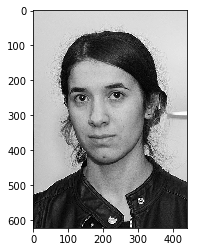

In [4]:
plt.imshow(nadia,'gray')

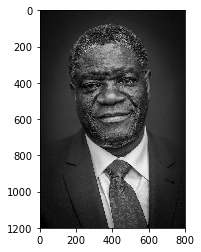

In [5]:
plt.imshow(denis,'gray')

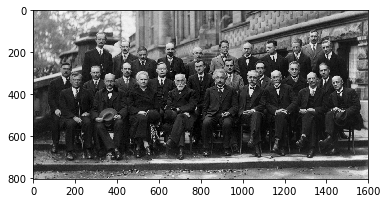

In [6]:
plt.imshow(solvay,'gray')

So first thing we need to do is , create a classifier and pass in the xml file classifier.
OpenCV comes with pretrained classifiers. :)

In [7]:
#Now we need to assign it to the object.

In [8]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\JERRY\Downloads\Computer-Vision-with-Python\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml")

This is basically a list of around 6000 classifiers/features that we are going to pass it to the image tos see if it fits all those features and can give us that indicaiton that the face is there in the image.

Lets create equipped function to actually functionalize the way this face cascade works, and then we can actually draw a rectangle.

In [9]:
def detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    # face rects is essentially x and y postion and width and height of the rectangle...
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),5)
        
    return face_img

In [10]:
results = detect_face(nadia)

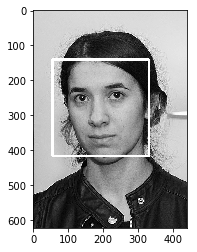

In [11]:
plt.imshow(results,'gray')

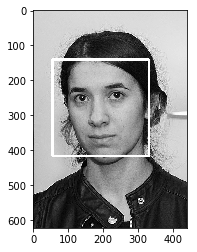

In [12]:
results = detect_face(nadia)
plt.imshow(results,'gray')

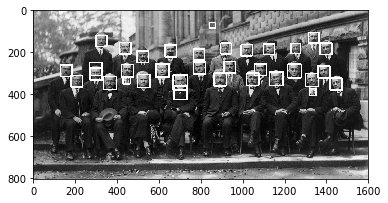

In [13]:
results = detect_face(solvay)
plt.imshow(results,'gray')

As we can see that becasue of the complexity of this image particulary, it detects double faces for some people and also identifing some objects which are not even a face.

to avoid this: we are gonna add few parameters, specifically scale factors and minimum neighbours.

In [14]:
def adj_detect_face(img):    # adj -- adjusted
    face_img = img.copy()
    
    #detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]) -> objects
#      @param scaleFactor Parameter specifying how much the image size is reduced at each image scale.
# .   @param minNeighbors Parameter specifying how many neighbors each candidate rectangle should have
# .   to retain it.
    
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    # face rects is essentially x and y postion and width and height of the rectangle...
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),5)
        
    return face_img

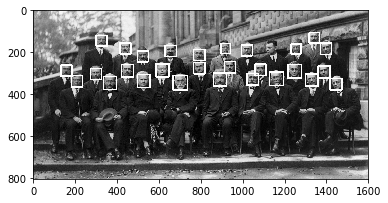

In [15]:
results = adj_detect_face(solvay)
plt.imshow(results,'gray')

We can notice we are getting much better and accurate detection of the actual face, but the person who is lookin sideways, now he is not being detected for that reason. we can play arounf with scalefactor and minimum neighbors to see if this issue gets solved or not.

just keep in mind that when we have image with lots of faces, people looking at different directions, some xml files that specifically made for the frontal face may not work very well.

## Lets check out the eye cascade file:

In [16]:
eyes_cascade = cv2.CascadeClassifier(r"C:/Users/JERRY/Downloads/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml")

In [17]:
def detect_eyes(img):
    face_img = img.copy()
    
    eyes_rects = eyes_cascade.detectMultiScale(face_img, scaleFactor=1.2,minNeighbors=5)
    
    # face rects is essentially x and y postion and width and height of the rectangle...
    
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),5)
        
    return face_img

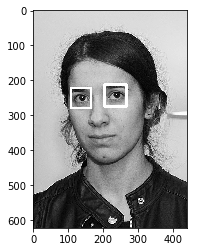

In [18]:
results = detect_eyes(nadia)
plt.imshow(results,'gray')

There might be some case where it detects features other than eyes , in that case we have to take the exact same measure that we took previously , by providing scale factor and minimum neighbors...

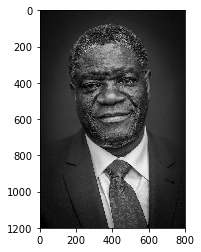

In [19]:
results = detect_eyes(denis)
plt.imshow(results,'gray')

Oopes! as we can notice that the whites around his eyes are kind of dark in color and that is why the eye cascade could not identify it as eyes... This could be one of the exceptions where we can not detect faces in the images like this where its difficut to identify the eye region because of the color grading  of the images.

# How can we apply this to the videos:

In [20]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    
    frame = detect_face(frame)   # its just that what we were doing with the sinle image, we can do it with single frame.
    
    cv2.imshow('Video Face Detect',frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()